In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class TSP:

    def __init__(self, cities, distances,coordinates):
        self.cities = cities
        self.distances = distances
        self.coordinates = coordinates
        self.best_fitness = np.inf
        self.best_route = None

    def get_distance(self, city1, city2):
        return self.distances[city1][city2]

    def get_fitness(self, route):
        fitness = 0
        for i in range(len(route)):
            fitness += self.get_distance(route[i], route[(i+1) % len(route)])
        return fitness

    def get_random_route(self):
        return np.random.permutation(self.cities)
    
    def plot_route(self, route):
        route_coordinates = [self.coordinates[city] for city in route]
        route_coordinates.append(route_coordinates[0]) 
        xs, ys = zip(*route_coordinates)
        plt.figure()
        plt.plot(xs, ys, 'xb-')
        for i, city in enumerate(route):
            plt.annotate(city, (xs[i], ys[i]))
        plt.show()

    def crossover(self, route1, route2):
        child = np.zeros(len(route1), dtype=int)
        for i in range(len(route1)):
            if route1[i] in route2:
                child[i] = route1[i]
        for i in range(len(route1)):
            if child[i] == 0:
                for j in range(len(route1)):
                    if route2[j] not in child:
                        child[i] = route2[j]
                        break
        return child

    def mutate(self, route):
        i = np.random.randint(len(route))
        j = np.random.randint(len(route))
        route[i], route[j] = route[j], route[i]
        return route

    def run(self, generations, population_size, crossover_rate, mutation_rate):
        population = []
        for i in range(population_size):
            population.append(self.get_random_route())
        for generation in range(generations):
            fitnesses = []
            for route in population:
                fitness = self.get_fitness(route)
                fitnesses.append(fitness)
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_route = route
            if generation % 10 == 0:  # plot every 10 generations
                print(f"Generation {generation}, best fitness: {self.best_fitness}")
                self.plot_route(self.best_route)
            fitnesses = np.array(fitnesses)
            fitnesses = fitnesses/fitnesses.sum()
            new_population = [self.best_route] 
            for i in range(population_size - 1):  #
                route1 = population[np.random.choice(population_size, p=fitnesses)]
                route2 = population[np.random.choice(population_size, p=fitnesses)]
                if np.random.rand() < crossover_rate:  
                    child = self.crossover(route1, route2)
                else: 
                    child = route1 if np.random.rand() < 0.5 else route2
                if np.random.rand() < mutation_rate:
                    child = self.mutate(child)
                new_population.append(child)
            population = new_population
        return self.best_route, self.best_fitness

    def print_route(self, route):
        for city in route:
            print(self.cities[city], end=' ')
        print(self.cities[route[0]])

Generation 0, best fitness: 75


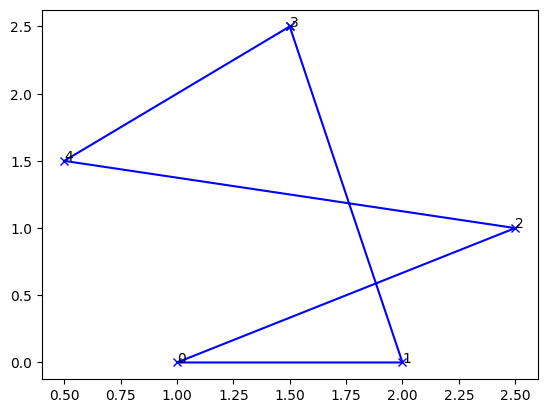

Generation 10, best fitness: 75


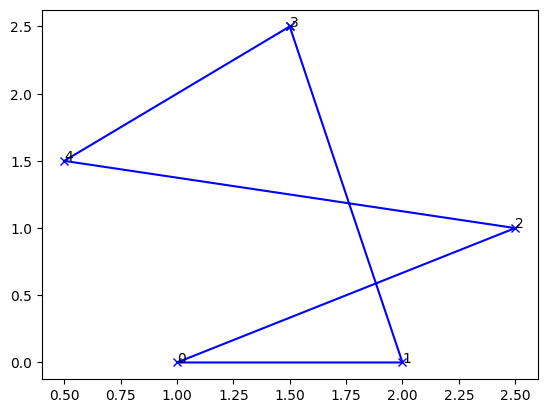

Generation 20, best fitness: 75


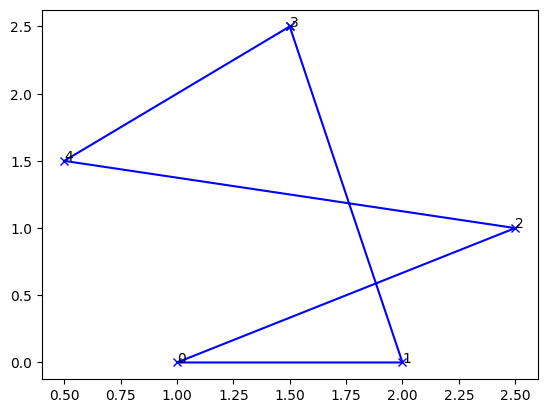

Generation 30, best fitness: 75


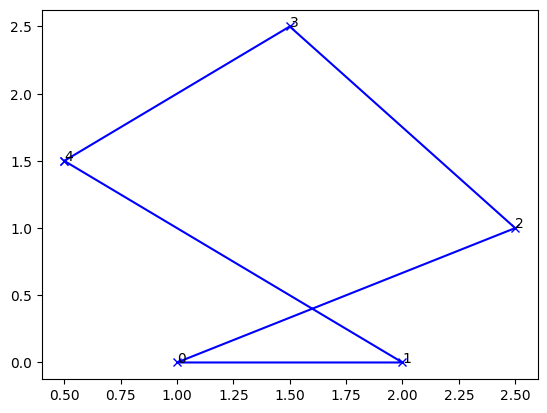

Generation 40, best fitness: 75


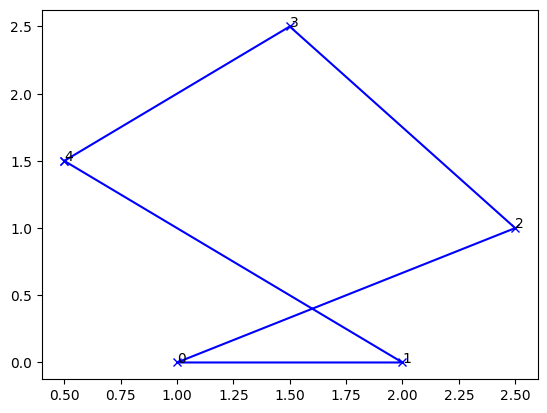

Generation 50, best fitness: 75


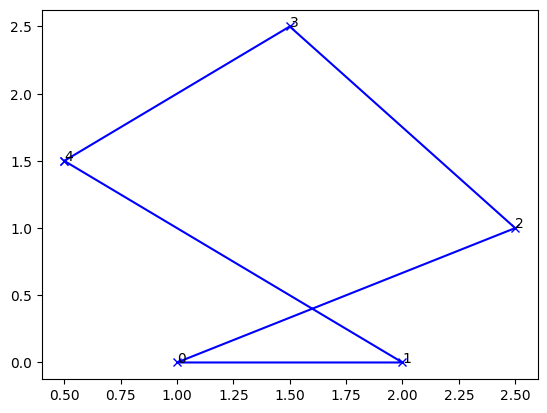

Generation 60, best fitness: 75


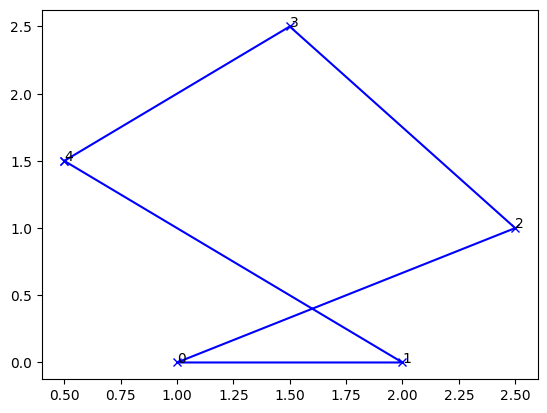

Generation 70, best fitness: 75


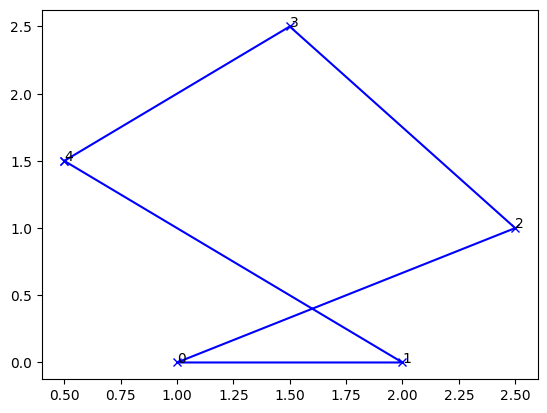

Generation 80, best fitness: 75


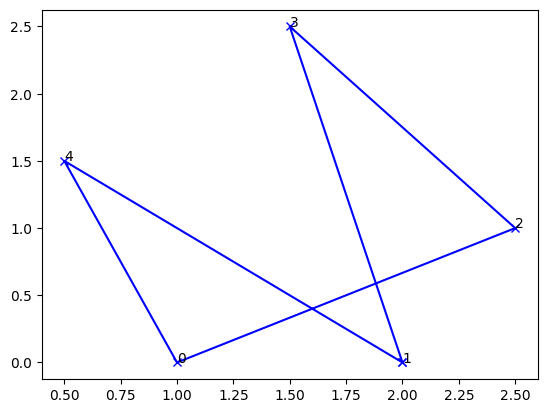

Generation 90, best fitness: 75


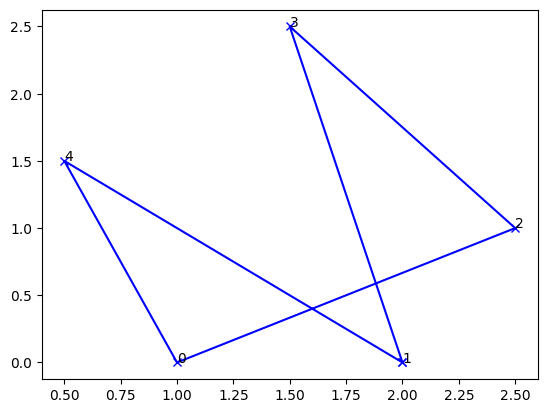

Best fitness:  75
Best route: 1 4 0 2 3 1


In [20]:
tsp = TSP([0, 1, 2, 3, 4], [[0, 10, 15, 20, 25],
                            [10, 0, 35, 25, 20], 
                            [15, 35, 0, 30, 10], 
                            [20, 25, 30, 0, 15], 
                            [25, 20, 10, 15, 0]], [(1,0),(2,0),(2.5,1),(1.5,2.5),(0.5,1.5)])


route, fitness = tsp.run(100, 100, 0.8, 0.1)

print('Best fitness: ', fitness)

print('Best route: ', end='')
tsp.print_route(route)